In [8]:
"""
===-*- General Batch plottingTool -*-===
Copyright (c) makkiblog.com
MIT License 
coding: utf-8

===-*- VERSION -*-===
v0.1 Initial version
v0.2 Updated limits
vvvCODEvvv
"""

#Setup
import numpy as np
from pylab import *
from scipy import signal
from scipy import interpolate
from scipy import integrate
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import pandas as pd
import os
import sys
import configparser
import codecs
import csv
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

mpl.rcParams['agg.path.chunksize'] = 100000

In [9]:
#Setup (Visual)
import seaborn as sns
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.5})
sns.set_style('whitegrid')

plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams['figure.facecolor'] = 'white'


In [10]:
#===========DEFINE FUNCTIONS==========
#====DEFINE AXIS READ==========
def xls_df(file_name,sheets,skip,transpose):
    #sheet must be list
    dflist=list()
    i=0
    for sheet in sheets:
        df = pd.read_excel("./Data/" + file_name + '.xlsx', sheet_name=sheets[i], header=0, skiprows = skip, index_col=False)
        df = df.reset_index(drop=True)
        if transpose == 'N':
            pass
        elif transpose == 'Y':
            df=df.transpose ()
            df.columns = df.iloc[0]
            df = df[1:]
            #print(df.columns.values.tolist())
        else:
            print('ERROR:Enter Y or N for transpose option (default is columns = keys)')
        dflist.append(df)
        i+=1
    return dflist

#=========DEFINE PLOT FUNCTION==========
def plotdf(dflist,sheets,ax,i,j,rowx,rowy):
    mult = 0.9
    skip = 2
    columnnames = dflist[0].columns.values.tolist()
    ax[i,j].set_xlabel(columnnames[rowx]+' ['+str(dflist[0].iloc[0,rowx])+']')
    ax[i,j].set_ylabel(columnnames[rowy]+' ['+str(dflist[0].iloc[0,rowy])+']')
    k=0
    minx=min(dflist[0].iloc[skip:,rowx])*mult
    maxx=max(dflist[0].iloc[skip:,rowx])/mult
    miny=min(dflist[0].iloc[skip:,rowy])*mult
    maxy=max(dflist[0].iloc[skip:,rowy])/mult
    
    for df in dflist:
        df=df.iloc[skip:]
        if(min(df.iloc[:,rowx])*mult < minx):
            minx = min(df.iloc[:,rowx])*mult
        if(max(df.iloc[:,rowx])/mult > maxx):
            maxx = max(df.iloc[:,rowx])/mult
        if(min(df.iloc[:,rowy])*mult < miny):
            miny = min(df.iloc[:,rowy])*mult
        if(max(df.iloc[:,rowy])/mult > maxy):
            maxy = max(df.iloc[:,rowy])/mult
        ax[i,j].set_xlim((minx,maxx))
        ax[i,j].set_ylim((miny,maxy))
        ax[i,j].plot(df.iloc[:,rowx],df.iloc[:,rowy],label=sheets[k])
        k+=1
    ax[i,j].legend()
    ax[i,j].set_title(columnnames[rowy])
    

In [11]:
#========================MAIN PLOT=============================
def plot(file_name,sheets,skip,transpose):
    dflist=xls_df(file_name,sheets,skip,transpose)
        
    #print dataframe
    i=0
    for df in dflist:
        #print(df)
        #df.to_csv('./Data/df_' + sheets[i] + ".csv")
        i+=1
    
    #===============PLOT SETTINGS (Customize)=================
    fig1,ax1=plt.subplots(2,3)

    plotdf(dflist,sheets,ax1,0,0,0,25)
    plotdf(dflist,sheets,ax1,0,1,0,31)
    plotdf(dflist,sheets,ax1,0,2,0,33)
    plotdf(dflist,sheets,ax1,1,0,0,62)
    plotdf(dflist,sheets,ax1,1,1,0,15)
    plotdf(dflist,sheets,ax1,1,2,0,10)

    fig1.suptitle(file_name+' Engine Performance')
    fig1.tight_layout()
    fig1.savefig("./Data/" + file_name + sheets[0] + '_EngPerfo.jpg', dpi=300)
    #-----------------------------------------------------------

    fig2,ax2=plt.subplots(2,3)

    plotdf(dflist,sheets,ax2,0,0,0,5)
    plotdf(dflist,sheets,ax2,0,1,0,7)
    plotdf(dflist,sheets,ax2,0,2,0,17)
    plotdf(dflist,sheets,ax2,1,0,0,46)
    plotdf(dflist,sheets,ax2,1,1,0,54)
    plotdf(dflist,sheets,ax2,1,2,0,56)
    
    fig2.suptitle(file_name+' Turbocharger Performance')
    fig2.tight_layout()
    fig2.savefig("./Data/" + file_name + sheets[0] + '_TurboPerfo.jpg', dpi=300)
    #-----------------------------------------------------------

    fig3,ax3=plt.subplots(2,3)

    plotdf(dflist,sheets,ax3,0,0,0,13)
    plotdf(dflist,sheets,ax3,0,1,0,14)
    plotdf(dflist,sheets,ax3,0,2,0,18)
    plotdf(dflist,sheets,ax3,1,0,0,34)
    plotdf(dflist,sheets,ax3,1,1,0,10)
    plotdf(dflist,sheets,ax3,1,2,0,15)
    
    fig3.suptitle(file_name+' Pressures_Temps')
    fig3.tight_layout()
    fig3.savefig("./Data/" + file_name + sheets[0] + '_PressureTemps.jpg', dpi=300)
    #-----------------------------------------------------------


    plt.show()
    
    

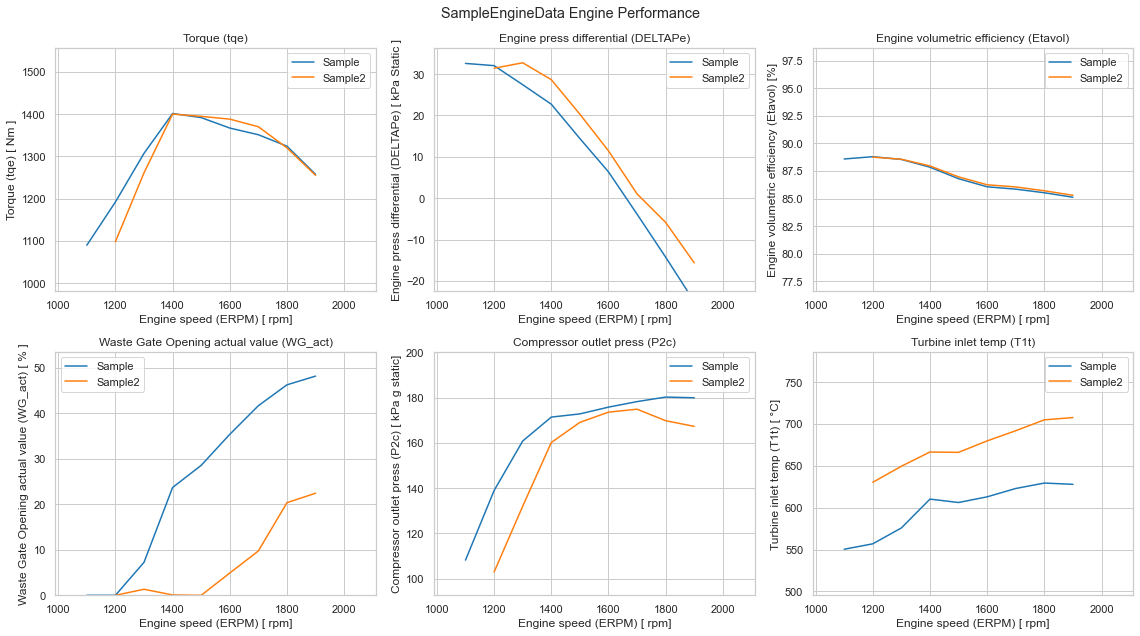

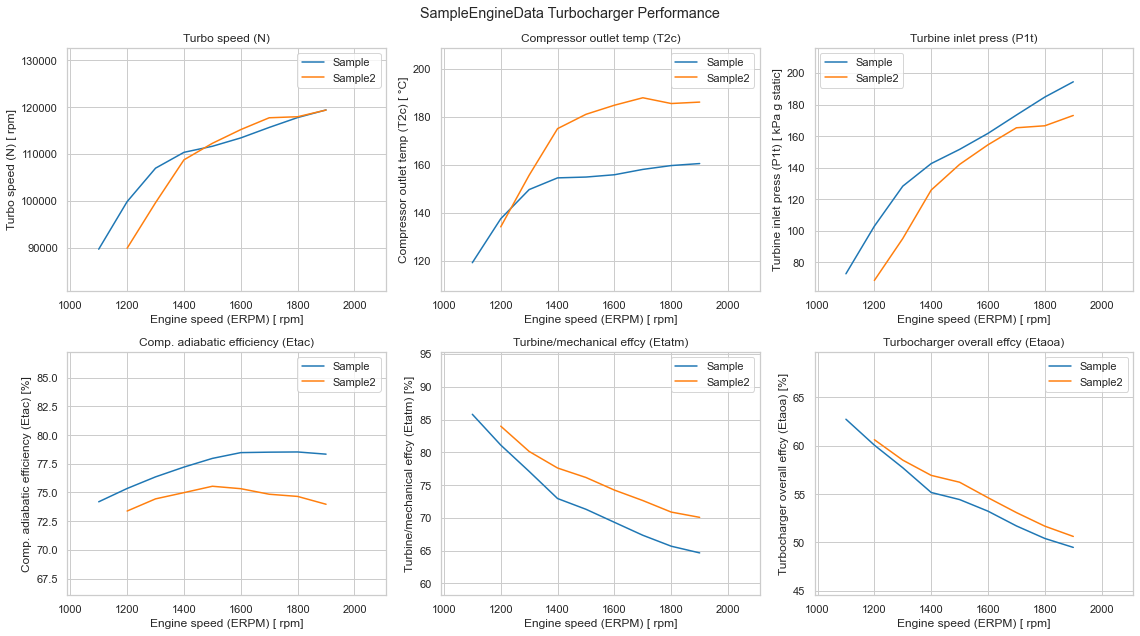

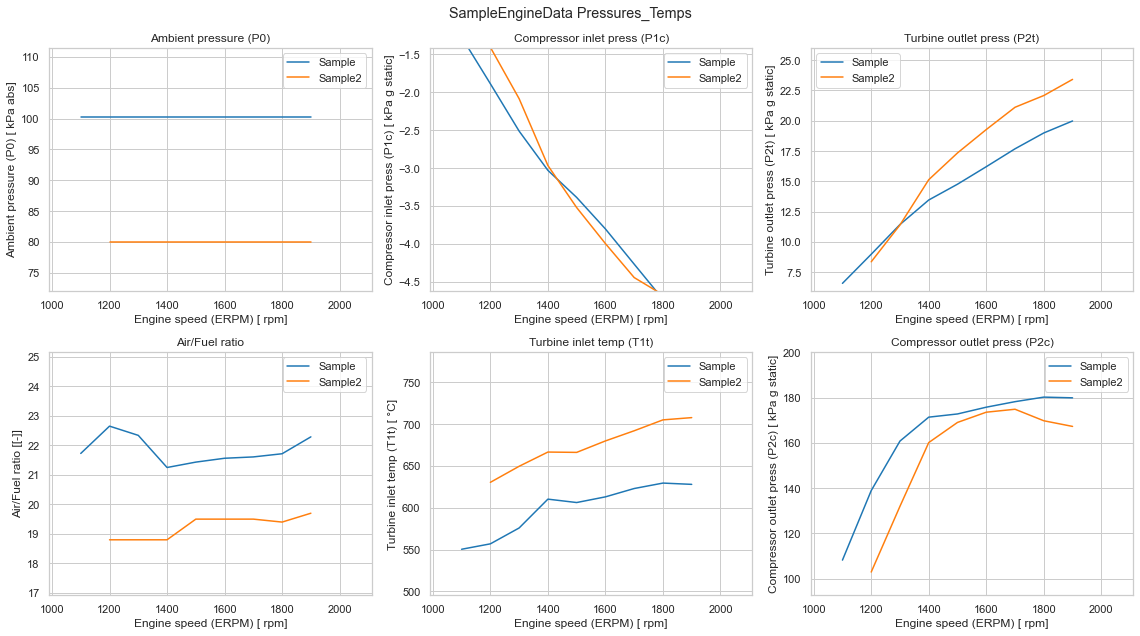

In [12]:
#Syntax: filename, sheetname,skiprows,transpose Y/N
sheets = ['Sample','Sample2']
plot("SampleEngineData",sheets,13,'Y')

